<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0223/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml0223/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f3cea35d150>)

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")



資料預處理：


1.   類別：Pclass. Name(mid). Sex. Cabin(1st).Embarked
2.   數值：Age. Sibsp. Parch. Ticket(count). Fare

第一步：填補缺失：補最可能的值
  *   類別：補最常出現or不補
  *   數值：中位數 （不可以填平均）


  






In [ ]:
datas = pd.concat([train_df, test_df], axis=0, ignore_index=True)
#pd.concat連結兩個表格 ：axis=0 縱向連接(有相同欄位), axis=1橫向連接(向右新增欄位)

In [ ]:
s = datas.isna().sum()
#isna幫你看欄位內是不是空的
s[s > 0].sort_values(ascending=False)
#Series[True/False]
#ascending=False由大到小排序

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 數值類型: 中位數 ,用 median()取中位數
med = datas.median().drop("Pclass")
# Pclass是類別,不可以用中位數,要用眾數,這裡去除掉
datas = datas.fillna(med)

In [ ]:
# 類別類型: 使用最常出現
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)


In [ ]:
#pandas.isna()檢測缺失值
s = datas.isna().sum()
# Series[True/False]
s[s > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

第二步：只要是類別,要做one-hot encoding

PClass存在大小關西,可以不做one-hot encoding
, sex是二值型,也可以不做



In [ ]:
def cabin(s):
      if pd.isna(s):
          return None
      else:
          return s[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [ ]:
def name(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.strip()
    return mid
count = datas["Name"].apply(name).value_counts()
reserved = count[:4].index
#只留下前四種數量最多職稱

def name2(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.strip()
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(name2)

In [ ]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,3,Mr,male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,None,S
1305,1,None,female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,3,Mr,male,28.0,0,0,359309,8.0500,None,S


In [ ]:
dic = datas["Ticket"].value_counts()
def ticket(t):
    return dic[t]
datas["Ticket"] = datas["Ticket"].apply(ticket)

In [ ]:
#做one-hot encoding
datas = pd.get_dummies(datas)
#Pclass因為被判定為數值沒有做one-hot encoding,這裡強制這一欄做get_dummies
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


第三步：利用已知的欄位,做出新的欄位來幫助決策,記得不要刪除本來的欄位

In [ ]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y = train_df["Survived"]
# .iloc: [1st row, 2nd rows....]取列(橫的)
# 因為datas是train跟test合併再一起,現在要把train的資料取出來0~890筆
x = datas.iloc[:len(train_df)]
predict = datas.iloc[len(train_df):]

使用同一份資料,使用不同的演算法,算出來的結果會差不多

Ensemble:隨機森林,創造出很多個決策樹,每顆決策樹都放棄一點資料,因此每顆決策樹帶入的訓練資料會略有不同,最後投票出一個最佳結果


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(11, 151, 2),
    "max_depth":range(5, 11)
}
#GridSearch函式：利用交叉驗證幫你調出最佳參數
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring="neg_log_loss")
grid.fit(x, y)
print(grid.best_score_)
print(grid.best_params_)


-0.39606151877404167
{'max_depth': 7, 'n_estimators': 91}


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
#Cross validation交叉驗證：將資料分成n等份,訓練和測試n次
clf = RandomForestClassifier(n_estimators=67, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
# 這裡就不用 fit 了, fit 和 predict 會由交叉驗證幫你做, cv 參數代表要幾次的交叉驗證
# n_jobs=-1使用最多核心來運算
print(scores)
print(np.average(scores))
clf = RandomForestClassifier(n_estimators=67, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1, scoring="neg_log_loss")
print(scores)
print(np.average(scores))

[0.81111111 0.86516854 0.75280899 0.88764045 0.85393258 0.82022472
 0.85393258 0.78651685 0.87640449 0.82022472]
0.832796504369538
[-0.45390313 -0.37693799 -0.60957542 -0.35285314 -0.32583991 -0.39355724
 -0.40741612 -0.42233347 -0.32840563 -0.36385674]
-0.4034678797813247


In [ ]:
clf = RandomForestClassifier(n_estimators=29, max_depth=7)
clf.fit(x, y)
pre = clf.predict(predict)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("rf.csv", encoding="utf-8", index=False)

In [ ]:
import pandas as pd
#RandomForestClassifier的Attributes:feature_importances_找出特徵的重要性
pd.DataFrame(clf.feature_importances_, 
       columns=["Importance"],
       index=datas.columns).sort_values(by="Importance", ascending=False)
       #ascending=False降冪排列

,Importance
Name_Mr,0.243111
Sex_male,0.111785
Sex_female,0.105432
Fare,0.100281
Age,0.071881
Family,0.066453
Pclass_3,0.056660
Ticket,0.056107
Name_Miss,0.030349
Pclass_1,0.024293


[Text(390.6, 665.91, 'Sex_male <= 0.5\ngini = 0.463\nsamples = 555\nvalue = [567, 324]\nclass = Dead'),
 Text(195.3, 475.65, 'Embarked_C <= 0.5\ngini = 0.396\nsamples = 191\nvalue = [82, 220]\nclass = Alive'),
 Text(97.65, 285.39, 'Pclass_2 <= 0.5\ngini = 0.424\nsamples = 148\nvalue = [74, 169]\nclass = Alive'),
 Text(48.825, 95.13, '\n  (...)  \n'),
 Text(146.47500000000002, 95.13, '\n  (...)  \n'),
 Text(292.95000000000005, 285.39, 'Cabin_D <= 0.5\ngini = 0.234\nsamples = 43\nvalue = [8, 51]\nclass = Alive'),
 Text(244.125, 95.13, '\n  (...)  \n'),
 Text(341.77500000000003, 95.13, '\n  (...)  \n'),
 Text(585.9000000000001, 475.65, 'Fare <= 14.479\ngini = 0.291\nsamples = 364\nvalue = [485, 104]\nclass = Dead'),
 Text(488.25, 285.39, 'Family <= 1.5\ngini = 0.196\nsamples = 212\nvalue = [308, 38]\nclass = Dead'),
 Text(439.425, 95.13, '\n  (...)  \n'),
 Text(537.075, 95.13, '\n  (...)  \n'),
 Text(683.5500000000001, 285.39, 'Name_Mr <= 0.5\ngini = 0.396\nsamples = 152\nvalue = [177, 66

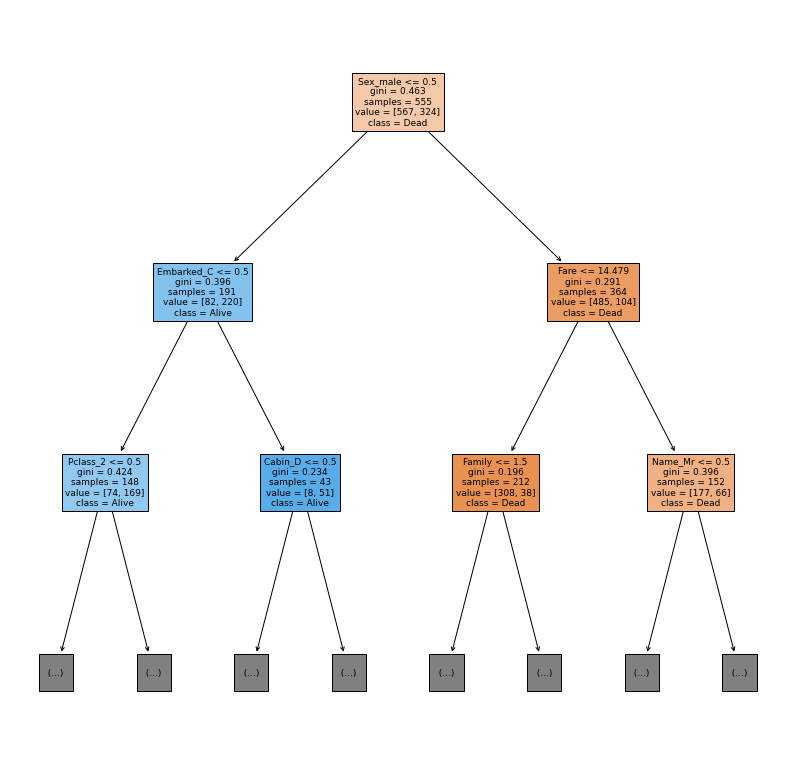

In [ ]:
#印出某棵決策樹
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
dt = clf.estimators_[1]
plt.figure(figsize=(14, 14))
plot_tree(dt, 
     feature_names=datas.columns, 
     class_names=["Dead", "Alive"],
     max_depth=2, 
     filled=True)

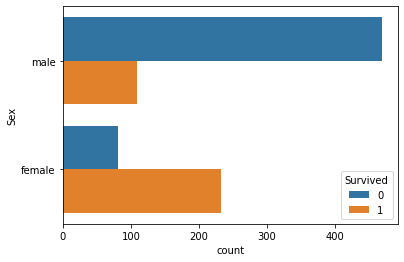

In [ ]:
# sns.countplot印長條圖
# sns.countplot(x=印直的,y=印橫的)
import seaborn as sns
sns.countplot(y=train_df["Sex"], hue=train_df["Survived"])


Text(0.5, 1.0, 'Fare Plot')

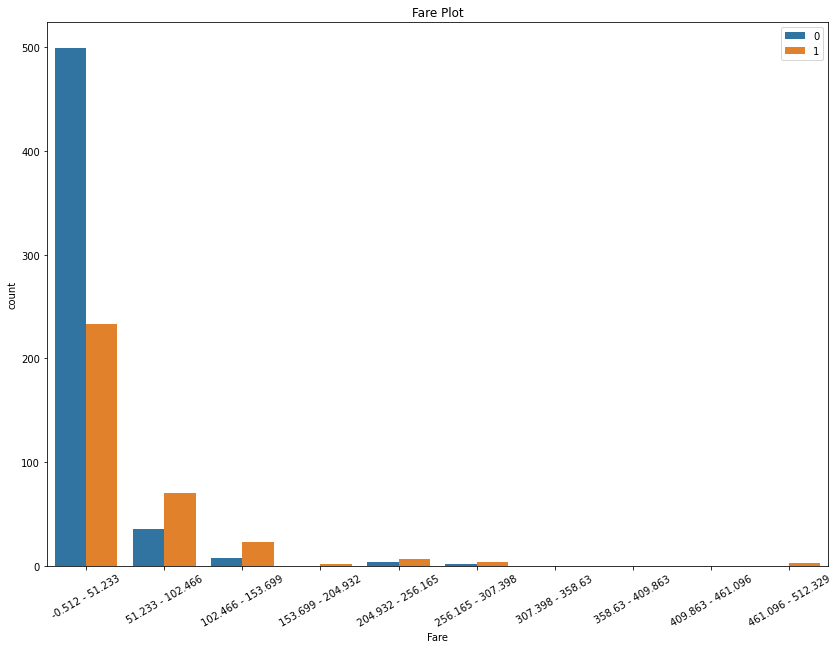

In [ ]:
#將Fare切成10個級距,bins:切成幾份
c = pd.cut(train_df["Fare"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
#xticks圖表底下x軸欄位文字的傾斜角度
plt.xticks(rotation=30)
#legend圖表註解的位置
plt.legend(loc='upper right')
plt.title("Fare Plot")

Text(0.5, 1.0, 'Fare Plot')

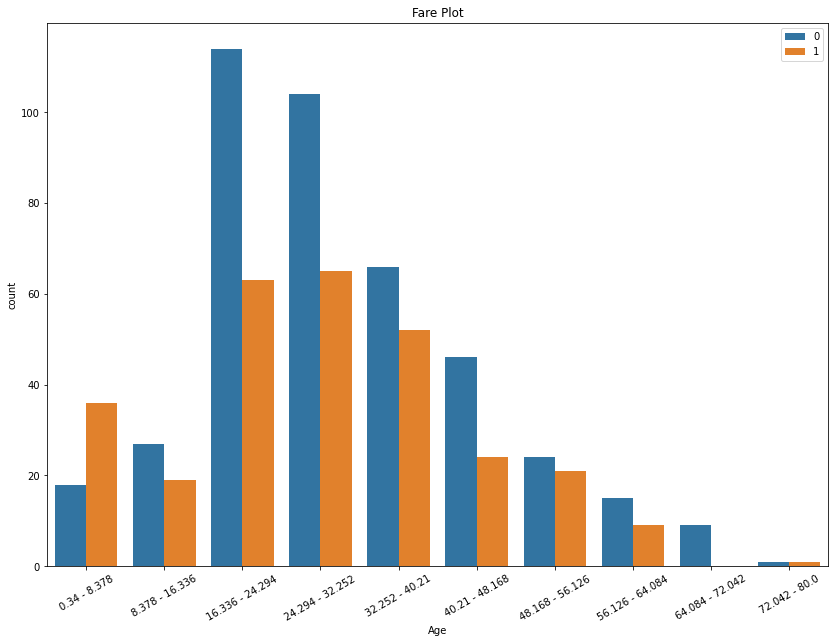

In [ ]:
c = pd.cut(train_df["Age"], bins=10)
def beautify(s):
    return str(s)[1:-1].replace(", ", " - ")
b = c.apply(beautify)
plt.figure(figsize=(14, 10))
sns.countplot(x=b, hue=train_df["Survived"])
plt.xticks(rotation=30)
plt.legend(loc='upper right')
plt.title("Fare Plot")

使用KNN演算法,要先做scaler,因為knn是以距離來算跟哪個相似分類



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
datas_scale = pd.DataFrame(datas_scale, columns=datas.columns)
datas_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_scale = datas_scale.iloc[:len(train_df)]
predict_scale = datas_scale.iloc[len(train_df):]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 200)
}
grid = GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring="neg_log_loss")
grid.fit(x_scale, y)
print(grid.best_score_)
print(grid.best_params_)

-0.4375600153125087
{'n_neighbors': 33}


In [ ]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(predict_scale)
ans = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
ans.to_csv("knn.csv", encoding="utf-8", index=False)

1.資料量：

*   RandomForest:抓全部資料
*   KNN:附近K個資料

2.調整參數:

*   RF:有運氣成分
*   KNN：比較穩定

3.特徵係數（特徵重要性）：

*   RF:有（挑選特徵）
*   KNN:無


  
  